# Intuitional Description

Bayesian mixture models are widely used in statistics to model data where observations come from a "mixture" of two or more different distributions.

# Graphical Summary

![fig](./cartoons/Bayesian_mixture_model.svg)

# Key Formula

In a mixture model, we assume that the observed data are generated from a weighted sum of $K$ different distributions, where each distribution corresponds to a different "component" in the mixture. The probability density function (PDF) of a mixture model can be written as:

$$
f(y) = \sum_{k=1}^{K} \pi_k f_k(y)
$$

Where:

- $f(y)$ is the overall probability density function for observation $y$
- $K$ is the number of component distributions (subpopulations)
- $\pi_k$ is the mixture weight for the $k$-th component (with $\sum_{k=1}^{K} \pi_k = 1$)
- $f_k$ is the probability density function of the $k$-th continuous distribution, or probability mass functions if they are $k$ discrete contributions


# Technical Details

## Component Densities and Mixture Proportions

$$
f(y) = \sum_{k=1}^{K} \pi_k f_k(y)
$$

This is called a **mixture distribution** (or mixture model, or just mixture) with $K$ components. (Sometimes it is called a finite mixture because one can also further generalize the ideas to an uncountably infinite number of components!)

The $f_1,…,f_K$ are called the **component densities** (or component distributions).

The $\pi_1,…,\pi_K$ are called the **mixture proportions**, where $\pi_k \geq 0$ and $\sum_{k=1}^K \pi_k=1$.

## Hidden Variables

The unobserved random variable $Z$ is sometimes referred to as the “component of origin” or the “component that gave rise to” the observation $Y$. If we have $N$ observations $Y_1,…,Y_N$ from a mixture model it is common to let $Z_i$ denote the component that gave rise to $Y_i$.

Introducing unobserved variables, $Z_i$, to help with computations or derivations is a common trick that is used beyond mixture models. This trick is sometimes called data augmentation. The unobserved random variables are sometimes called **hidden variables or latent variables**. Representing the mixture model

$$
p(y) = \sum_{k=1}^{K} \pi_k f_k(y)
$$

by the two-stage process:

$$
p(Z=k) = \pi_k \\
p(y|Z=k) = f_k(y)
$$

is called the **latent variable representation of the mixture model**.

## Mixture of normal distributions

In the case of a **mixture of normal distributions**, the individual components can be described by normal distributions with means $\mu_k$ and variances $\sigma_k^2$. The overall mixture density is then:

$$
f(y_i) = \sum_{k=1}^{K} \pi_k \mathcal{N}(y_i | \mu_k, \sigma_k^2)
$$

Where:
- $\mathcal{N}(y_i | \mu_k, \sigma_k^2)$ is the probability density function of the normal distribution for the $k$-th component, with mean $\mu_k$ and variance $\sigma_k^2$.

# Example

In this example, we'll demonstrate a Bayesian mixture model using height measurements from two subpopulations, likely representing females and males.

In [5]:
# Clear the environment
rm(list = ls())


Let's create a small dataset with 10 observations: 5 from the first distribution (likely females) and 5 from the second distribution (likely males), with true mixture proportions of 0.6 and 0.4.

In [6]:
# True parameters
mu1 <- 165  # Mean height for component 1 (likely females)
sigma1 <- 4  # SD for component 1
mu2 <- 175  # Mean height for component 2 (likely males)
sigma2 <- 5  # SD for component 2
pi1 <- 0.6  # Mixture proportion for component 1
pi2 <- 0.4  # Mixture proportion for component 2

# Generate 5 observations from each component
n1 <- 5
n2 <- 5
heights1 <- rnorm(n1, mu1, sigma1)
heights2 <- rnorm(n2, mu2, sigma2)

# Combine data (without labels)
heights <- c(heights1, heights2)
N <- length(heights)

# Print the heights
cat("Observed heights (in cm):\n")
print(round(heights, 1))

# True component membership (unknown in real applications)
true_components <- c(rep(1, n1), rep(2, n2))

Observed heights (in cm):


 [1] 168.8 163.3 157.1 162.8 161.1 176.8 173.2 179.4 173.8 168.6


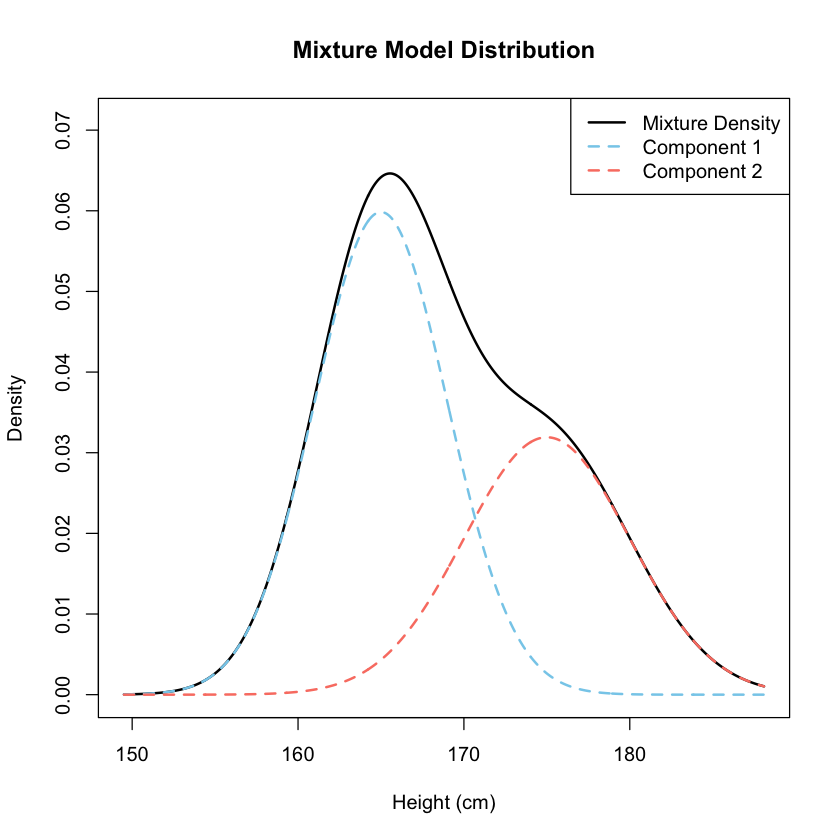

In [14]:
# After the code you provided, add this to plot the distributions:

# Create a range of x values for plotting
x <- seq(min(heights) - 10, max(heights) + 10, length.out = 1000)

# Calculate the density values
density1 <- pi1 * dnorm(x, mu1, sigma1)  # Component 1 (weighted)
density2 <- pi2 * dnorm(x, mu2, sigma2)  # Component 2 (weighted)
mixture_density <- density1 + density2    # Mixture density

# Create the plot
plot(x, mixture_density, type = "l", lwd = 2, col = "black",
     main = "Mixture Model Distribution",
     xlab = "Height (cm)", 
     ylab = "Density",
     ylim = c(0, max(mixture_density) * 1.1))

# Add component densities
lines(x, density1, col = "skyblue", lwd = 2, lty = 2)
lines(x, density2, col = "salmon", lwd = 2, lty = 2)

# Add a legend
legend("topright", 
       legend = c("Mixture Density", "Component 1", "Component 2"),
       col = c("black", "skyblue", "salmon"),
       lwd = 2,
       lty = c(1, 2, 2))
